## 회귀분석 샘플 데이터 

- 보스턴 주택 가격 데이터
- 당뇨병 데이터
- 체력 검사 데이터

본격적인 회귀분석에 앞서 샘플 데이터를 확인해보기

---

### 00. Setting

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

---

### 01. 보스턴 주택 가격 데이터

1970년대 미국 보스턴의 주택 가격 데이터. `load_boston()` 명령으로 로드하며 다음과 같이 구성

#### 1. 타겟 데이터

- 1978 보스턴 주택 가격
- 506 타운의 주택 가격 중앙값 (단위 1,000 달러)

#### 2. 특징 데이터 
 * `CRIM`: 범죄율
 * `INDUS`: 비소매상업지역 면적 비율
 * `NOX`: 일산화질소 농도 
 * `RM`: 주택당 방 수
 * `LSTAT`: 인구 중 하위 계층 비율
 * `B`: 인구 중 흑인 비율
 * `PTRATIO`: 학생/교사 비율
 * `ZN`: 25,000 평방피트를 초과 거주지역 비율
 * `CHAS`: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 * `AGE`: 1940년 이전에 건축된 주택의 비율
 * `RAD`: 방사형 고속도로까지의 거리
 * `DIS`: 직업센터의 거리
 * `TAX`:	재산세율

In [2]:
# 데이터 로드
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# DataFrame 생성 (분석에 용이)
dfX = pd.DataFrame(boston.data, columns = boston.feature_names) # Feature 데이터 생성
dfy = pd.DataFrame(boston.target, columns = ["MEDV"]) # y값 (target 데이터)
df = pd.concat([dfX, dfy], axis=1) # Feature와 y값 붙이기
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
# 기초 통계량 확인
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


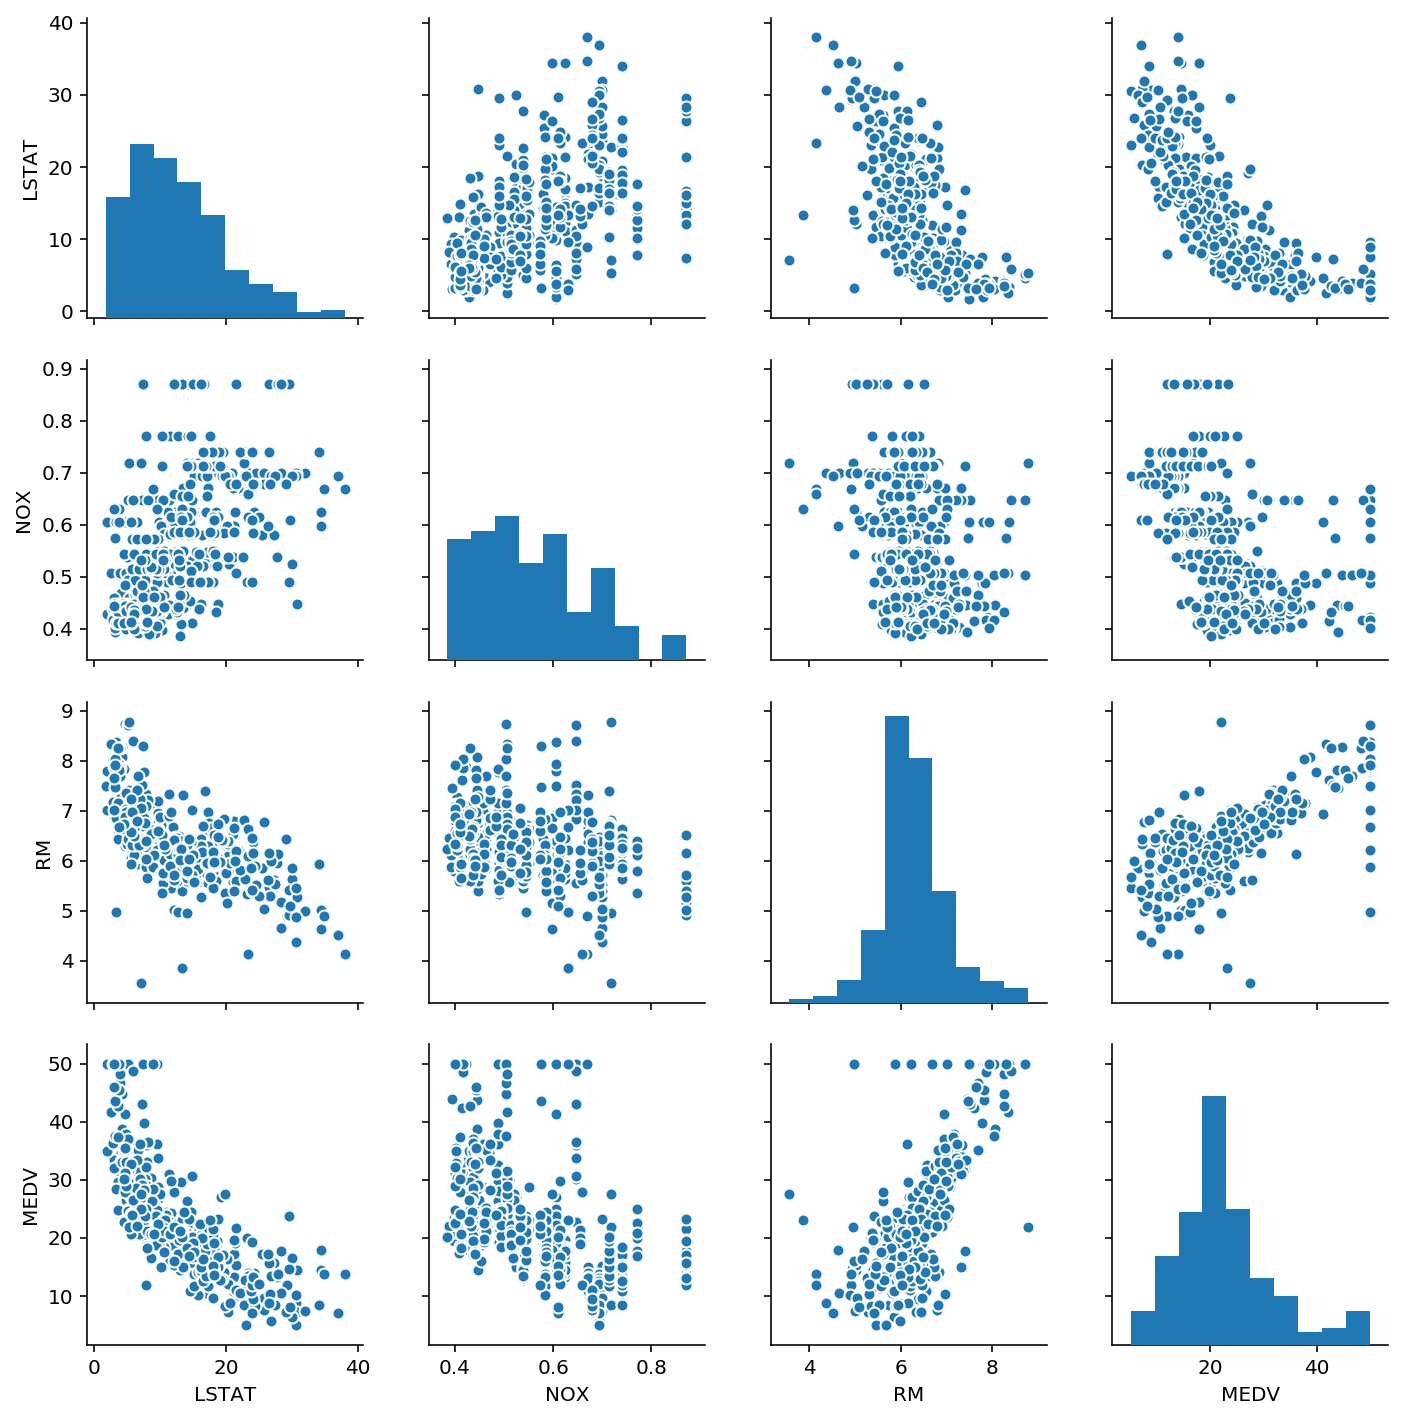

In [5]:
cols = ["LSTAT", "NOX", "RM", "MEDV"] # LSAT, NOX, RM, MEDV 관계 파악
sns.pairplot(df[cols])
plt.show()

---

### 02. 당뇨병 데이터

442 명의 당뇨병 환자의 검사 데이터. load_diabetes() 명령으로 로드하며 다음과 같이 구성

#### 1. 타겟 데이터
* 1년 후의 당뇨병 진행도

#### 2. 특징 데이터
- 나이, 성병, BMI(body mass index) 지수, 혈압 및 6개의 혈청 검사 수치

In [6]:
# 데이터 로드
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
df.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [7]:
# 기초 통계량 확인
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


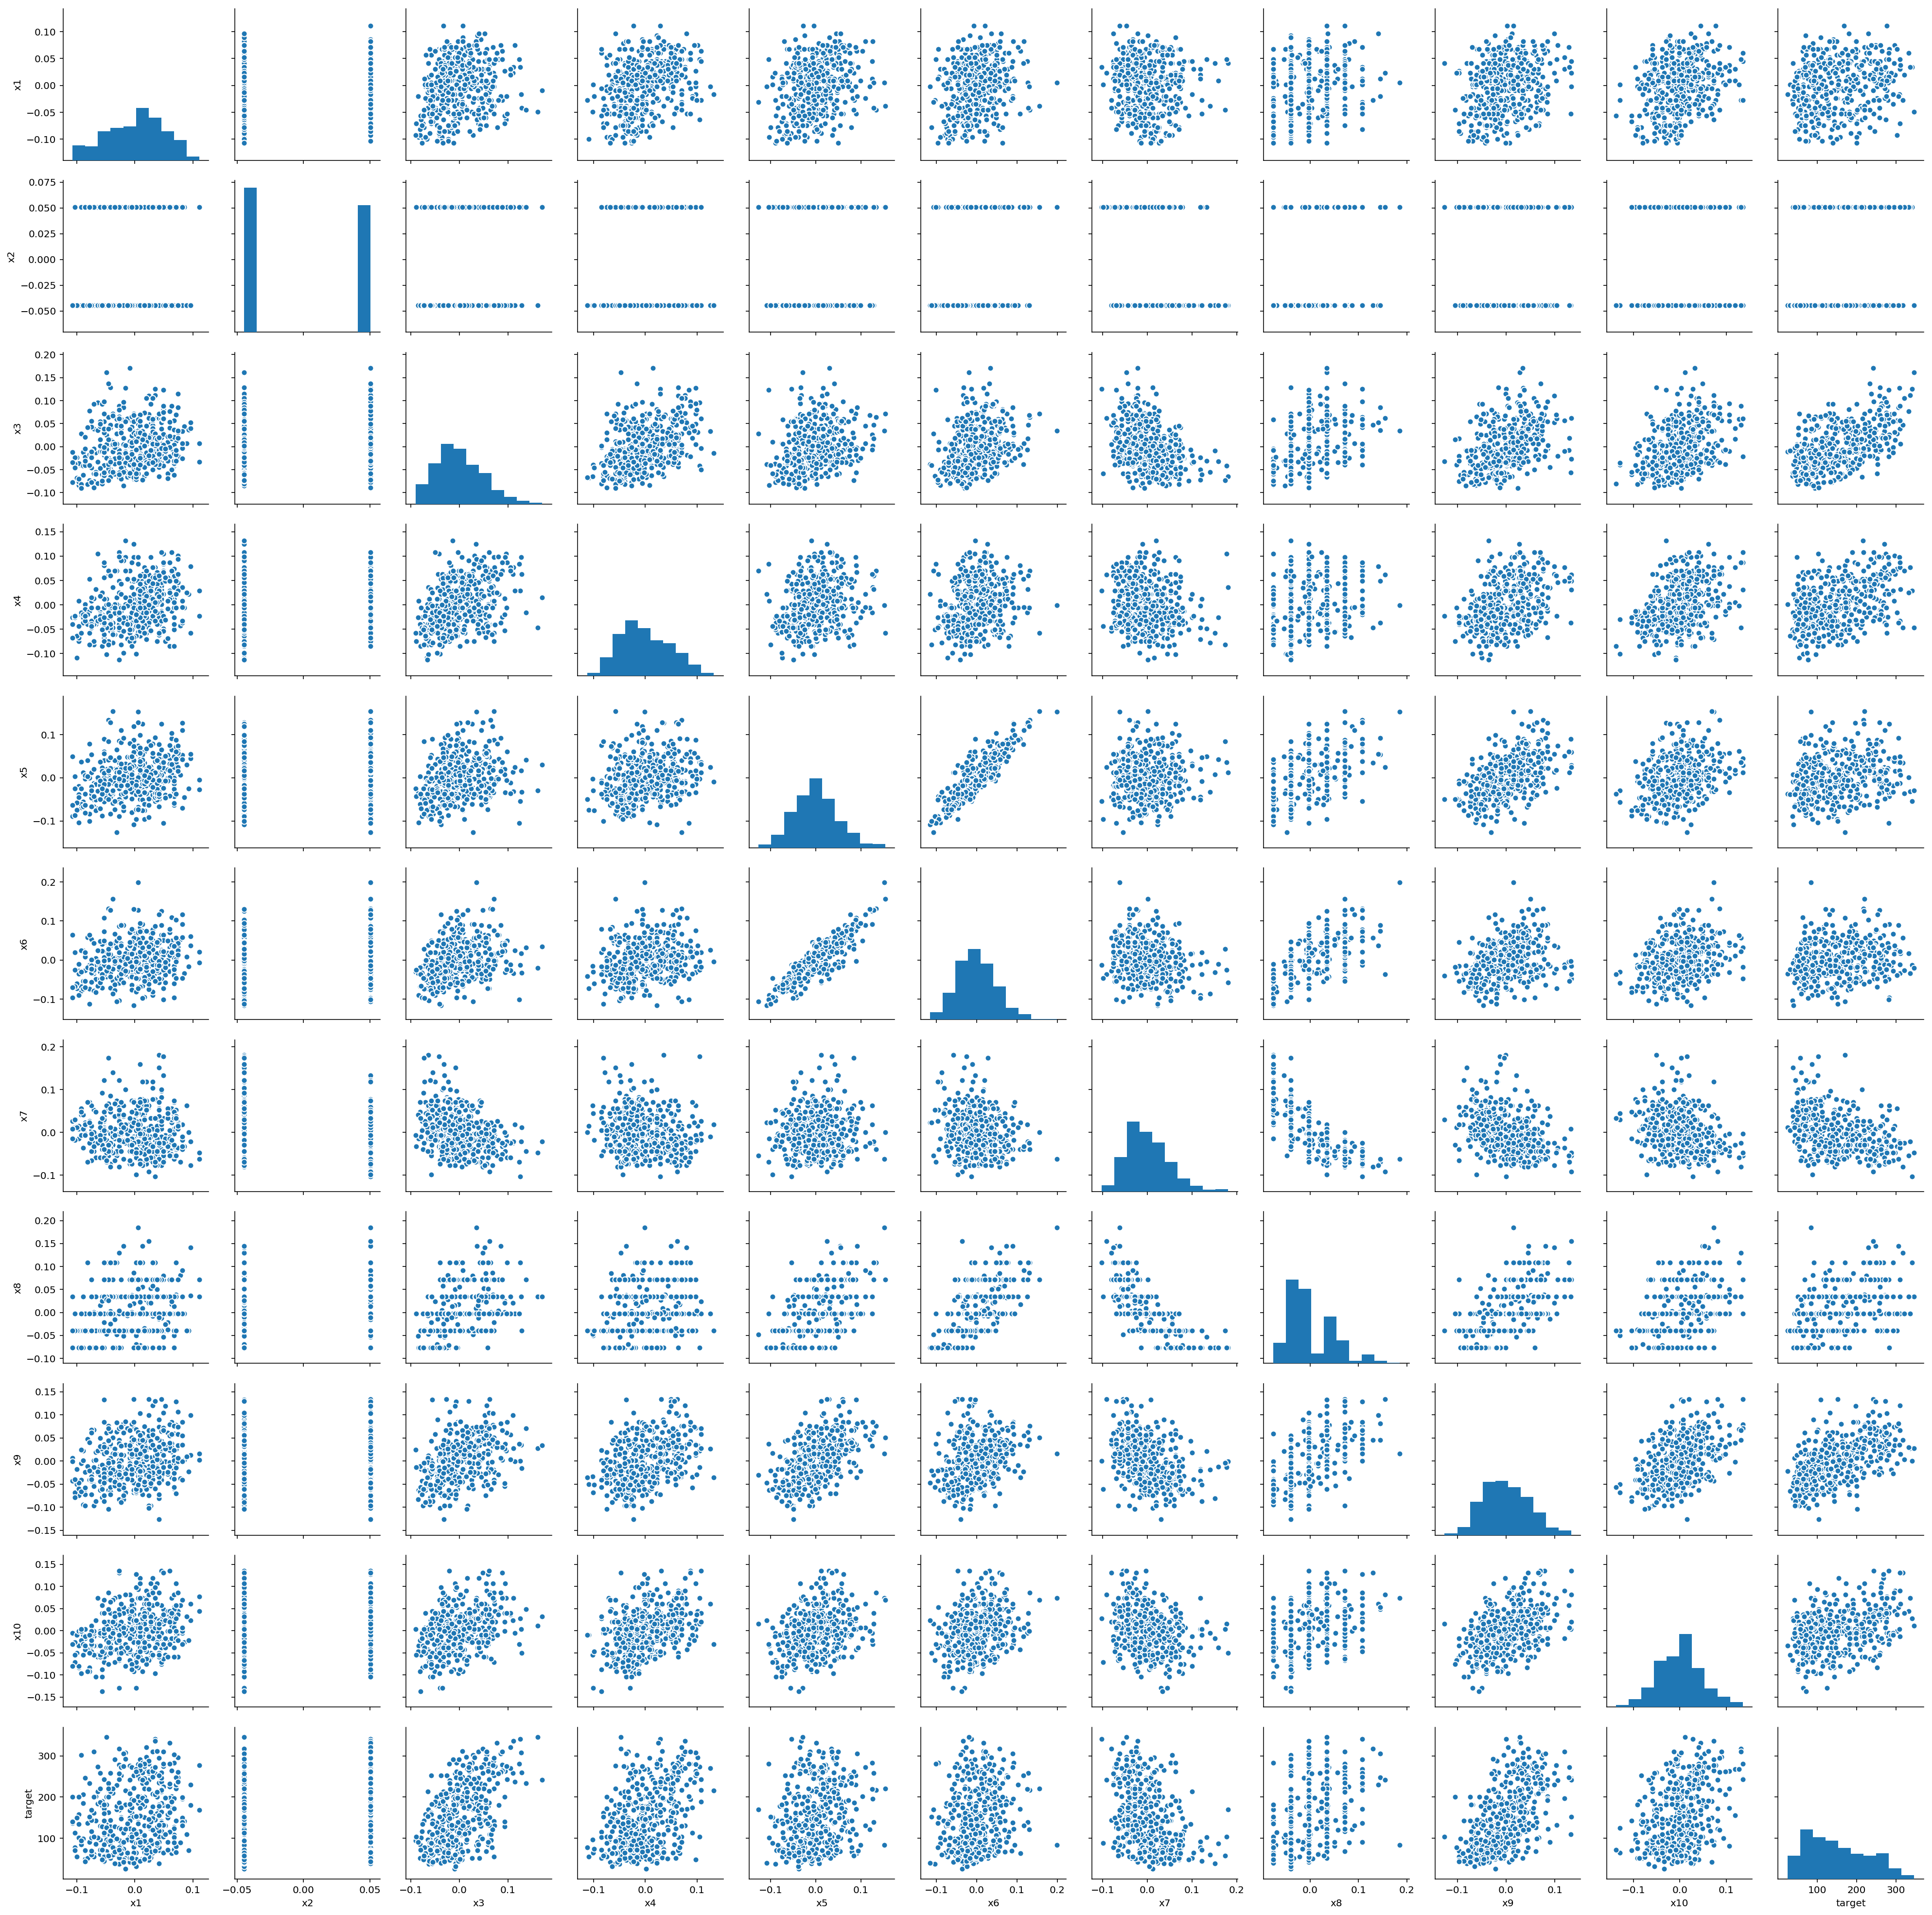

In [8]:
sns.pairplot(df) # 변수들간 관계 파악
plt.show()

---

### 03. 체력 검사 데이터

신체 상황 및 운동 능력을 측정한 데이터. `load_linnerud()` 명령으로 로드하며 다음과 같이 구성

#### 1. 타겟 데이터

* 체중, 허리둘레, 맥박의 세가지 신체 상황

#### 2. 특징 데이터

* 턱걸이, 앉았다 일어나기, 점프의 세가지 운동 능력

In [9]:
# 데이터 로드
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print(linnerud.DESCR)

Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [10]:
# feature 데이터와 target 데이터 합치기
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.00,210.00,120.00,202.00,37.00,62.00
16,4.00,60.00,25.00,176.00,37.00,54.00
17,11.00,230.00,80.00,157.00,32.00,52.00
18,15.00,225.00,73.00,156.00,33.00,54.00
19,2.00,110.00,43.00,138.00,33.00,68.00


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


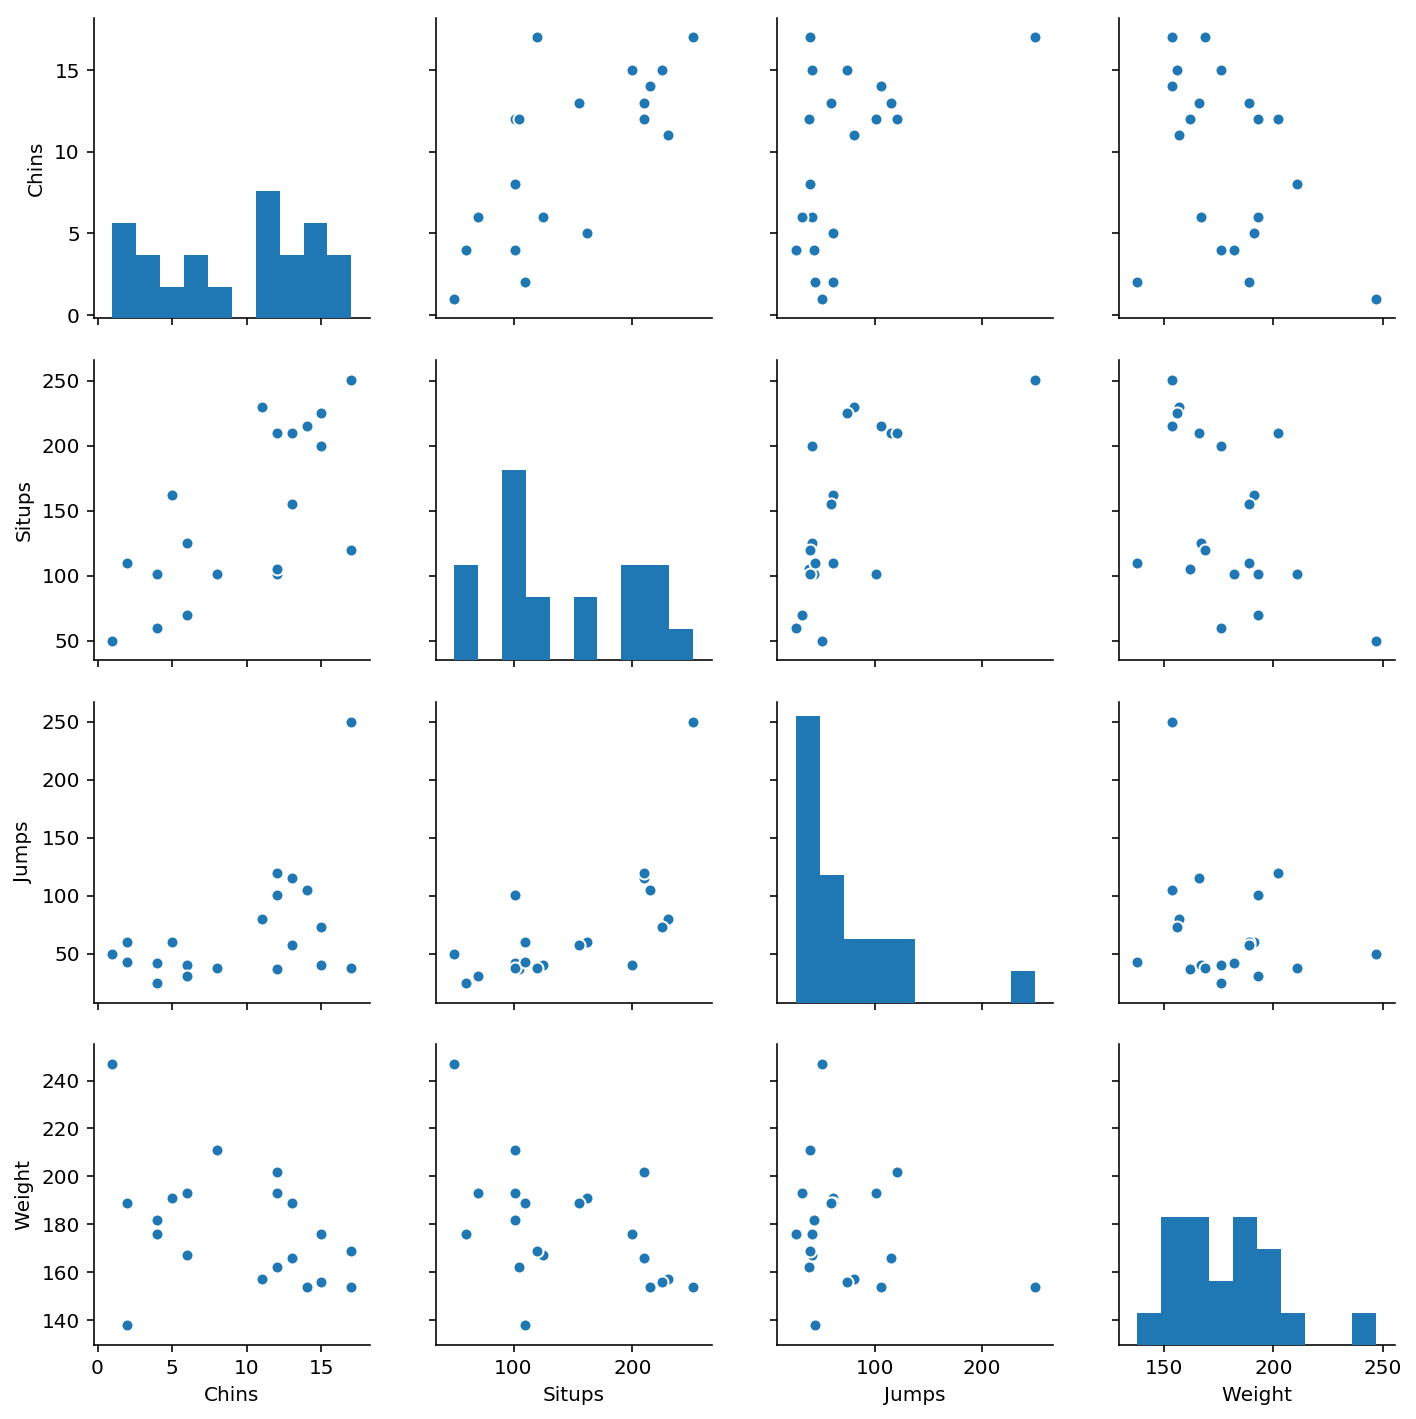

In [11]:
# 데이터 시각화1
sns.pairplot(df.ix[:, :4]) # 턱걸이, 앉았다 일어나기, 점프와 몸무게의 관계 파악
plt.show()

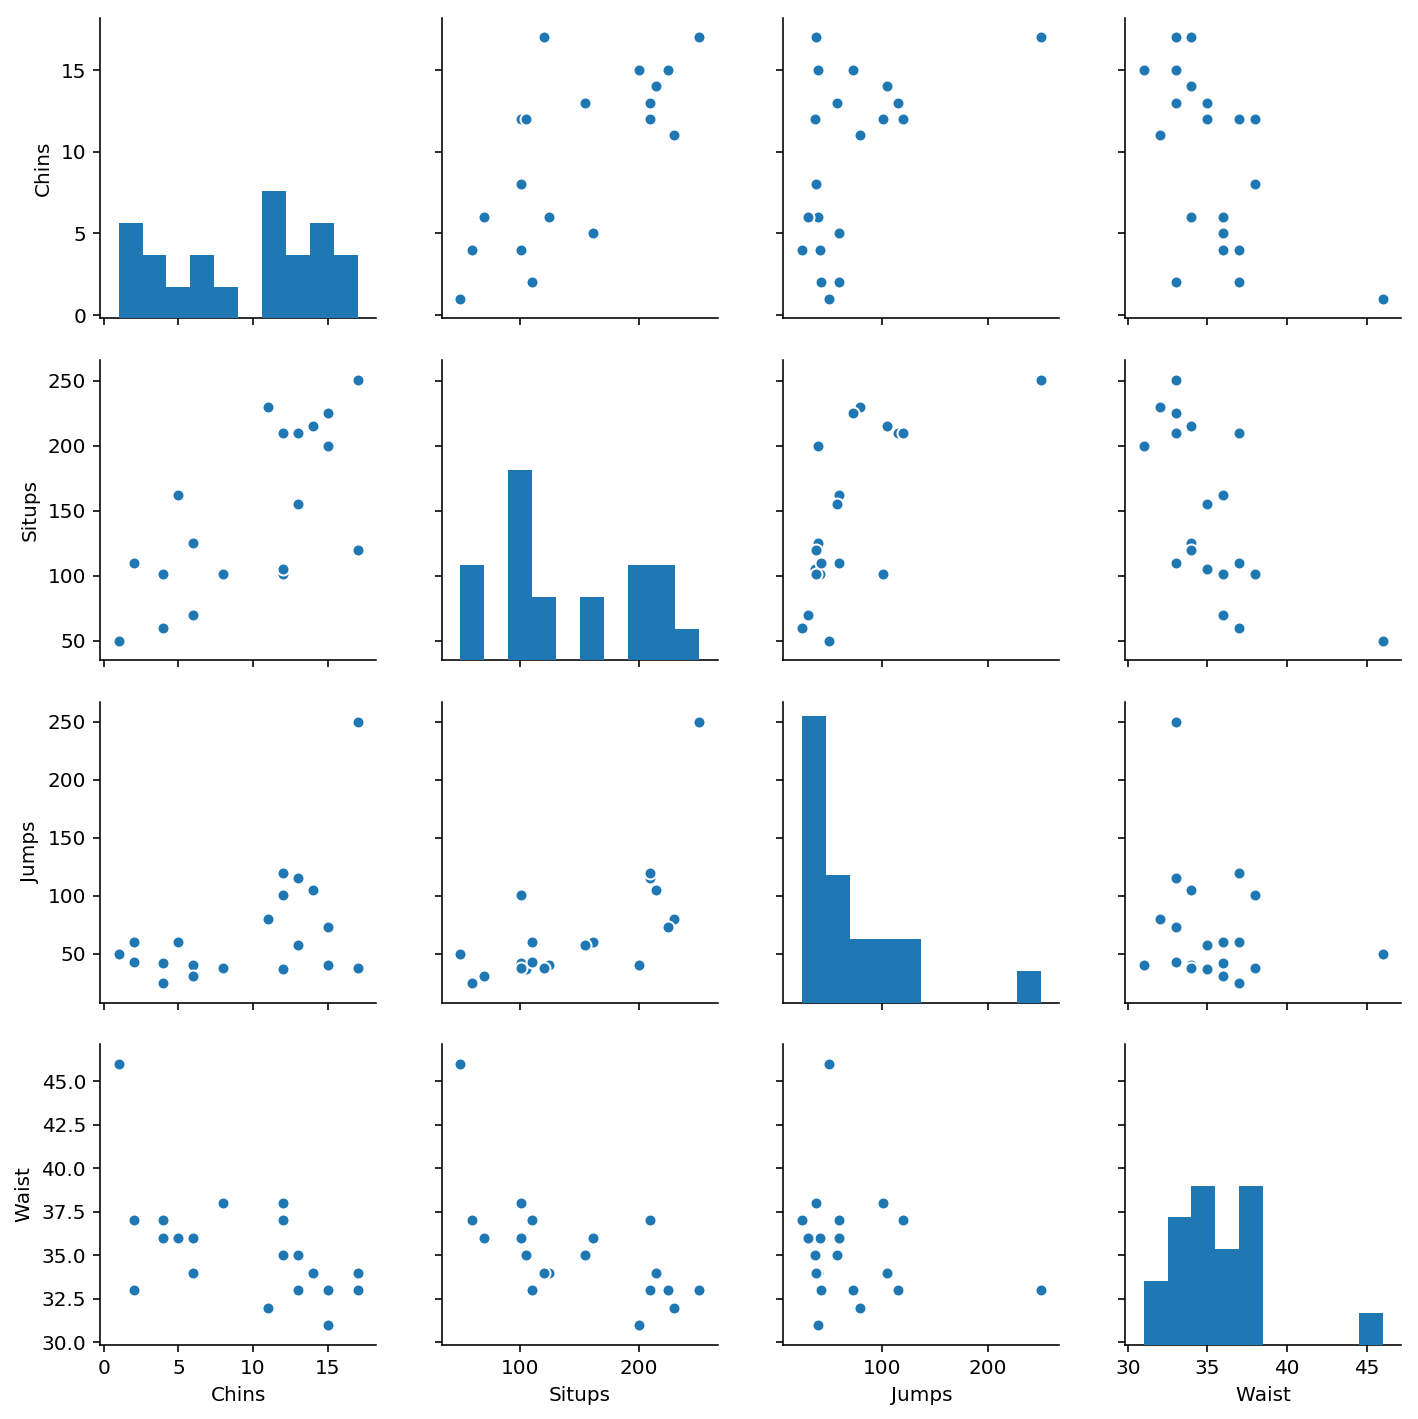

In [12]:
# 데이터 시각화2
cols = ["Chins", "Situps", "Jumps", "Waist"]
sns.pairplot(df[cols]) # 턱걸이, 앉았다 일어나기, 점프와 허리둘레의 관계 파악
plt.show()

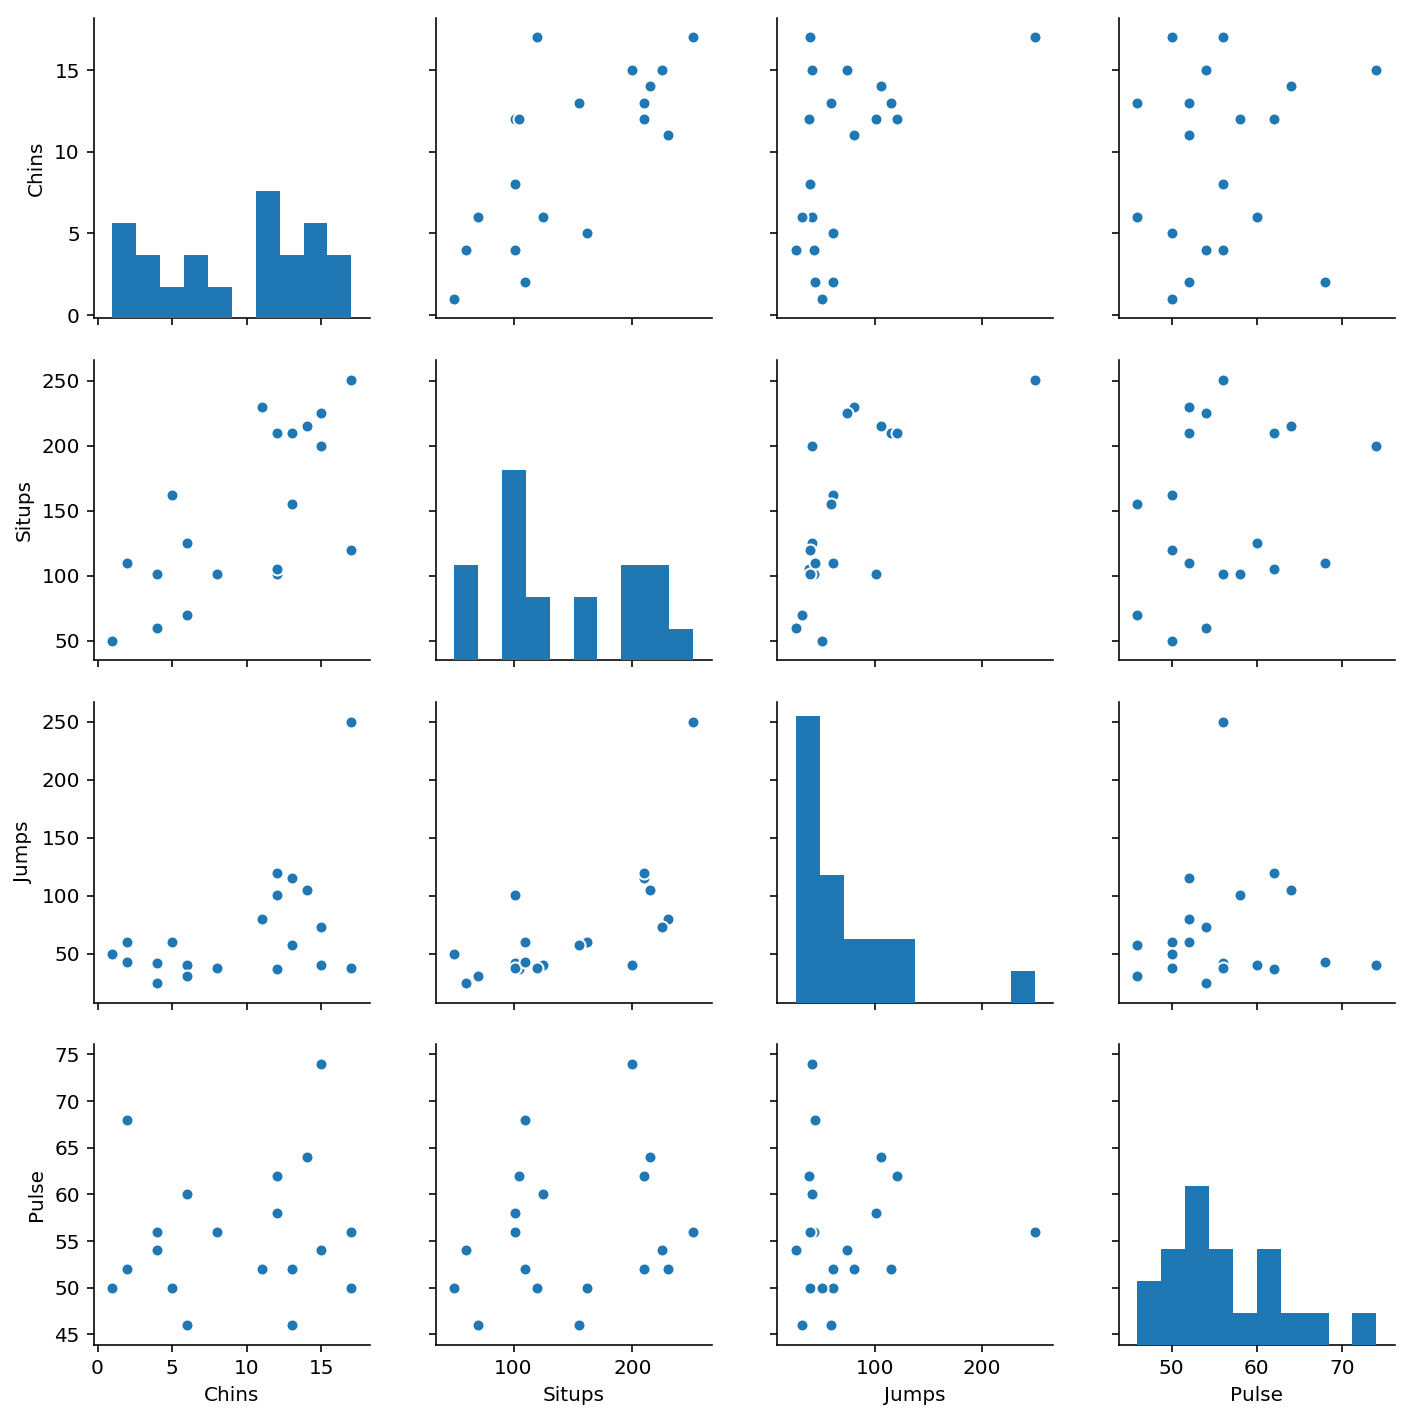

In [13]:
# 데이터 시각화2
cols = ["Chins", "Situps", "Jumps", "Pulse"]
sns.pairplot(df[cols]) # 턱걸이, 앉았다 일어나기, 점프와 맥박의 관계 파악
plt.show()